In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

pd.options.display.max_colwidth = 200
pd.options.display.max_rows = 205

- GDP per capita: https://ec.europa.eu/eurostat/databrowser/view/nama_10r_2gdp__custom_19505008/default/table (2014)
- Tertiary Education: https://ec.europa.eu/eurostat/databrowser/view/edat_lfse_04__custom_19512246/default/table (2014)
- Unemployment Rate: https://ec.europa.eu/eurostat/databrowser/view/lfst_r_lfu3rt__custom_19506585/default/table (2014)
- Population Density (Log): https://ec.europa.eu/eurostat/databrowser/view/demo_r_d3dens/default/table?lang=en (2014)
- Number of programmes: calculated in main.ipynb
- Share of Agriculture / Industry (Gross value added at basic prices): https://ec.europa.eu/eurostat/databrowser/view/nama_10r_3gva__custom_19512452/default/table (2014)
- Fund Size (Log): calculated in main.ipynb from (P (EU_planned))

In [163]:
regions = pd.read_csv("./datasets/clean/regs.csv")

## GDP per capita

In [164]:
gdpc = pd.read_excel("./datasets/eurostat/nama_10r_2gdp.xlsx", sheet_name="Sheet 1", skiprows=8)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [165]:
gdpc = gdpc.rename(columns={"GEO (Codes)" : "Region_ID", "Unnamed: 1" : "gdpc"})

In [166]:
gdpc = gdpc[["Region_ID", "gdpc"]]

In [167]:
gdpc

,Region_ID,gdpc
0,EU27_2020,26700
1,BE,36000
2,BE1,64500
3,BE10,64500
4,BE2,36200
...,...,...
469,TRC2,3800
470,TRC3,4500
471,NaN,NaN
472,Special value,NaN


In [168]:
controls = pd.merge(regions, gdpc, on="Region_ID", how="left").copy()

### Fixing PT NUTS codes
PT16, PT17, PT18 values can be found in this report: https://ec.europa.eu/eurostat/documents/2995521/7192292/1-26022016-AP-EN.pdf/602b34e8-abba-439e-b555-4c3cb1dbbe6e

In [170]:
portugal_patch = {
    'PT16': 14400, # Centro
    'PT17': 22800, # Lisboa
    'PT18': 15000, # Alentejo
}

controls['gdpc'] = controls['gdpc'].astype(float).fillna(controls['Region_ID'].map(portugal_patch))


In [171]:
controls

,Region_ID,gdpc
0,AT,38600.0
1,BE,36000.0
2,BE1,64500.0
3,BE2,36200.0
4,BE3,26000.0
5,BG,6100.0
6,CY,20500.0
7,CZ,15100.0
8,DE,36100.0
9,DE1,41500.0


## Unemployment rate

In [172]:
unpl = pd.read_excel("./datasets/eurostat/lfst_r_lfu3rt.xlsx", sheet_name="Sheet 1", skiprows=11)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [173]:
unpl = unpl.rename(columns={"GEO (Codes)" : "Region_ID", "Unnamed: 1" : "unpl"})

In [174]:
unpl = unpl[["Region_ID", "unpl"]]

In [175]:
unpl

,Region_ID,unpl
0,EU27_2020,10.9
1,EA20,11.7
2,BE,8.5
3,BE1,18.3
4,BE10,18.3
...,...,...
510,TRC2,17.5
511,TRC3,24.1
512,NaN,NaN
513,Special value,NaN


In [176]:
controls = pd.merge(controls, unpl, on="Region_ID", how="left")

### Fixing FI2, ÅLAND
Their own database: https://pxweb.asub.ax/PXWeb/pxweb/en/Statistik/Statistik__AR__Arbetslöshet/AR001.px/table/tableViewLayout2/

u ~ 4%

In [177]:
controls.loc[controls["Region_ID"] == "FI2", "unpl"] = 4.0

In [178]:
controls["unpl"] = pd.to_numeric(controls["unpl"])

In [179]:
controls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Region_ID  151 non-null    object 
 1   gdpc       151 non-null    float64
 2   unpl       151 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.7+ KB


In [180]:
controls

,Region_ID,gdpc,unpl
0,AT,38600.0,5.6
1,BE,36000.0,8.5
2,BE1,64500.0,18.3
3,BE2,36200.0,5.1
4,BE3,26000.0,11.9
5,BG,6100.0,11.4
6,CY,20500.0,16.1
7,CZ,15100.0,6.1
8,DE,36100.0,5.0
9,DE1,41500.0,3.1


## Population density (log)
Person/km^2

In [181]:
dens = pd.read_excel("./datasets/eurostat/demo_r_d3dens.xlsx", sheet_name="Sheet 1", skiprows=8)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [182]:
dens = dens.rename(columns={"GEO (Codes)" : "Region_ID", "Unnamed: 1" : "dens"})

In [183]:
dens = dens[["Region_ID", "dens"]]

In [184]:
dens

,Region_ID,dens
0,EU27_2020,108
1,EU28,116.9
2,EU27_2007,117.4
3,BE,369.6
4,BE1,7319.4
...,...,...
2064,TRC33,67.4
2065,TRC34,57.8
2066,NaN,NaN
2067,Special value,NaN


In [185]:
controls = pd.merge(controls, dens, on="Region_ID", how="left")

In [186]:
controls["dens"] = pd.to_numeric(controls["dens"])

In [187]:
controls["dens_log"] = np.log(controls["dens"])

In [188]:
controls = controls.drop(columns=["dens"])

In [189]:
controls

,Region_ID,gdpc,unpl,dens_log
0,AT,38600.0,5.6,4.641502
1,BE,36000.0,8.5,5.912421
2,BE1,64500.0,18.3,8.898284
3,BE2,36200.0,5.1,6.177529
4,BE3,26000.0,11.9,5.365041
5,BG,6100.0,11.4,4.194190
6,CY,20500.0,16.1,4.527209
7,CZ,15100.0,6.1,4.914858
8,DE,36100.0,5.0,5.422745
9,DE1,41500.0,3.1,5.699105


## Tertiary education
% of population in private households with tertiary education 25 to 64 all sexes

In [190]:
edu = pd.read_excel("./datasets/eurostat/edat_lfse_04.xlsx", sheet_name="Sheet 1", skiprows=11)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [191]:
edu = edu.rename(columns={"GEO (Codes)" : "Region_ID", "Unnamed: 1" : "edu"})

In [192]:
edu = edu[["Region_ID", "edu"]]

In [193]:
edu

,Region_ID,edu
0,EU27_2020,27.8
1,EA20,28.5
2,BE,36.9
3,BE1,43.5
4,BE10,43.5
...,...,...
545,TRC2,7.6
546,TRC3,7
547,NaN,NaN
548,Special value,NaN


In [194]:
controls = pd.merge(controls, edu, on="Region_ID", how="left")

In [195]:
controls["edu"] = pd.to_numeric(controls["edu"])

In [196]:
controls

,Region_ID,gdpc,unpl,dens_log,edu
0,AT,38600.0,5.6,4.641502,29.9
1,BE,36000.0,8.5,5.912421,36.9
2,BE1,64500.0,18.3,8.898284,43.5
3,BE2,36200.0,5.1,6.177529,37.2
4,BE3,26000.0,11.9,5.365041,33.9
5,BG,6100.0,11.4,4.194190,27.0
6,CY,20500.0,16.1,4.527209,40.3
7,CZ,15100.0,6.1,4.914858,21.5
8,DE,36100.0,5.0,5.422745,27.1
9,DE1,41500.0,3.1,5.699105,29.8


## Number of programs
(can be correlated with nuts level, so check later if necessary)

In [197]:
num = pd.read_csv("./datasets/clean/nOfProg.csv")

In [198]:
num = num.rename(columns={"Final_NUTS" : "Region_ID", "CCI" : "num_prog"})

In [199]:
controls = pd.merge(controls, num, on="Region_ID", how="left")

In [200]:
controls

,Region_ID,gdpc,unpl,dens_log,edu,num_prog
0,AT,38600.0,5.6,4.641502,29.9,4
1,BE,36000.0,8.5,5.912421,36.9,5
2,BE1,64500.0,18.3,8.898284,43.5,2
3,BE2,36200.0,5.1,6.177529,37.2,1
4,BE3,26000.0,11.9,5.365041,33.9,1
5,BG,6100.0,11.4,4.194190,27.0,10
6,CY,20500.0,16.1,4.527209,40.3,4
7,CZ,15100.0,6.1,4.914858,21.5,8
8,DE,36100.0,5.0,5.422745,27.1,2
9,DE1,41500.0,3.1,5.699105,29.8,3


## Share of Agriculture / Industry
Current prices, million Euros
TOTAL, A = agriculture, forestry, fisheries, B-E = Industry except construction

In [201]:
gva = pd.read_excel("./datasets/eurostat/nama_10r_3gva.xlsx", sheet_name="Sheet 1", skiprows=10)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [202]:
gva = gva.rename(columns={"GEO (Codes)" : "Region_ID", "Unnamed: 1" : "TOTAL", "Unnamed: 2" : "A", "Unnamed: 3" : "B-E"})

In [203]:
controls = pd.merge(controls, gva, on="Region_ID", how="left")

In [204]:
controls["share_agri"] = controls["A"] / controls["TOTAL"]
controls["share_ind"] = controls["B-E"] / controls["TOTAL"]

In [205]:
controls.columns

Index(['Region_ID', 'gdpc', 'unpl', 'dens_log', 'edu', 'num_prog', 'TOTAL',
       'A', 'B-E', 'share_agri', 'share_ind'],
      dtype='object')

In [206]:
controls = controls[['Region_ID', 'num_prog', 'gdpc', 'unpl', 'dens_log', 'edu','share_agri', 'share_ind']]

### Fixing PT NUTS codes again
https://www.adcoesao.pt/ine-anuarios-estatisticos-regionais/

In [207]:
portugal_patch_agri = {
    'PT16': 0.036, # Centro
    'PT17': 0.004, # Lisboa
    'PT18': 0.097, # Alentejo
}

portugal_patch_ind = {
    'PT16': 0.237, # Centro
    'PT17': 0.095, # Lisboa
    'PT18': 0.205, # Alentejo
}

controls['share_agri'] = controls['share_agri'].astype(float).fillna(controls['Region_ID'].map(portugal_patch_agri))
controls['share_ind'] = controls['share_ind'].astype(float).fillna(controls['Region_ID'].map(portugal_patch_ind))

In [208]:
controls

,Region_ID,num_prog,gdpc,unpl,dens_log,edu,share_agri,share_ind
0,AT,4,38600.0,5.6,4.641502,29.9,0.014349,0.227004
1,BE,5,36000.0,8.5,5.912421,36.9,0.007129,0.167180
2,BE1,2,64500.0,18.3,8.898284,43.5,0.000223,0.055502
3,BE2,1,36200.0,5.1,6.177529,37.2,0.009015,0.199262
4,BE3,1,26000.0,11.9,5.365041,33.9,0.008060,0.178463
5,BG,10,6100.0,11.4,4.194190,27.0,0.052561,0.226058
6,CY,4,20500.0,16.1,4.527209,40.3,0.021047,0.071142
7,CZ,8,15100.0,6.1,4.914858,21.5,0.026434,0.314508
8,DE,2,36100.0,5.0,5.422745,27.1,0.010048,0.254666
9,DE1,3,41500.0,3.1,5.699105,29.8,0.006111,0.342568


## EU ammount planned

In [209]:
plan = pd.read_csv("./datasets/clean/fondSize.csv")

In [210]:
plan = plan.rename(columns={"P_Planned_EU" : "plan_log"})

In [211]:
plan["plan_log"] = np.log(plan["plan_log"])

In [212]:
controls = pd.merge(controls, plan, on="Region_ID", how="left")

In [213]:
controls

,Region_ID,num_prog,gdpc,unpl,dens_log,edu,share_agri,share_ind,plan_log
0,AT,4,38600.0,5.6,4.641502,29.9,0.014349,0.227004,22.544804
1,BE,5,36000.0,8.5,5.912421,36.9,0.007129,0.167180,21.371476
2,BE1,2,64500.0,18.3,8.898284,43.5,0.000223,0.055502,18.751737
3,BE2,1,36200.0,5.1,6.177529,37.2,0.009015,0.199262,18.943333
4,BE3,1,26000.0,11.9,5.365041,33.9,0.008060,0.178463,20.325811
5,BG,10,6100.0,11.4,4.194190,27.0,0.052561,0.226058,23.026554
6,CY,4,20500.0,16.1,4.527209,40.3,0.021047,0.071142,20.676720
7,CZ,8,15100.0,6.1,4.914858,21.5,0.026434,0.314508,23.881001
8,DE,2,36100.0,5.0,5.422745,27.1,0.010048,0.254666,21.746747
9,DE1,3,41500.0,3.1,5.699105,29.8,0.006111,0.342568,21.095520


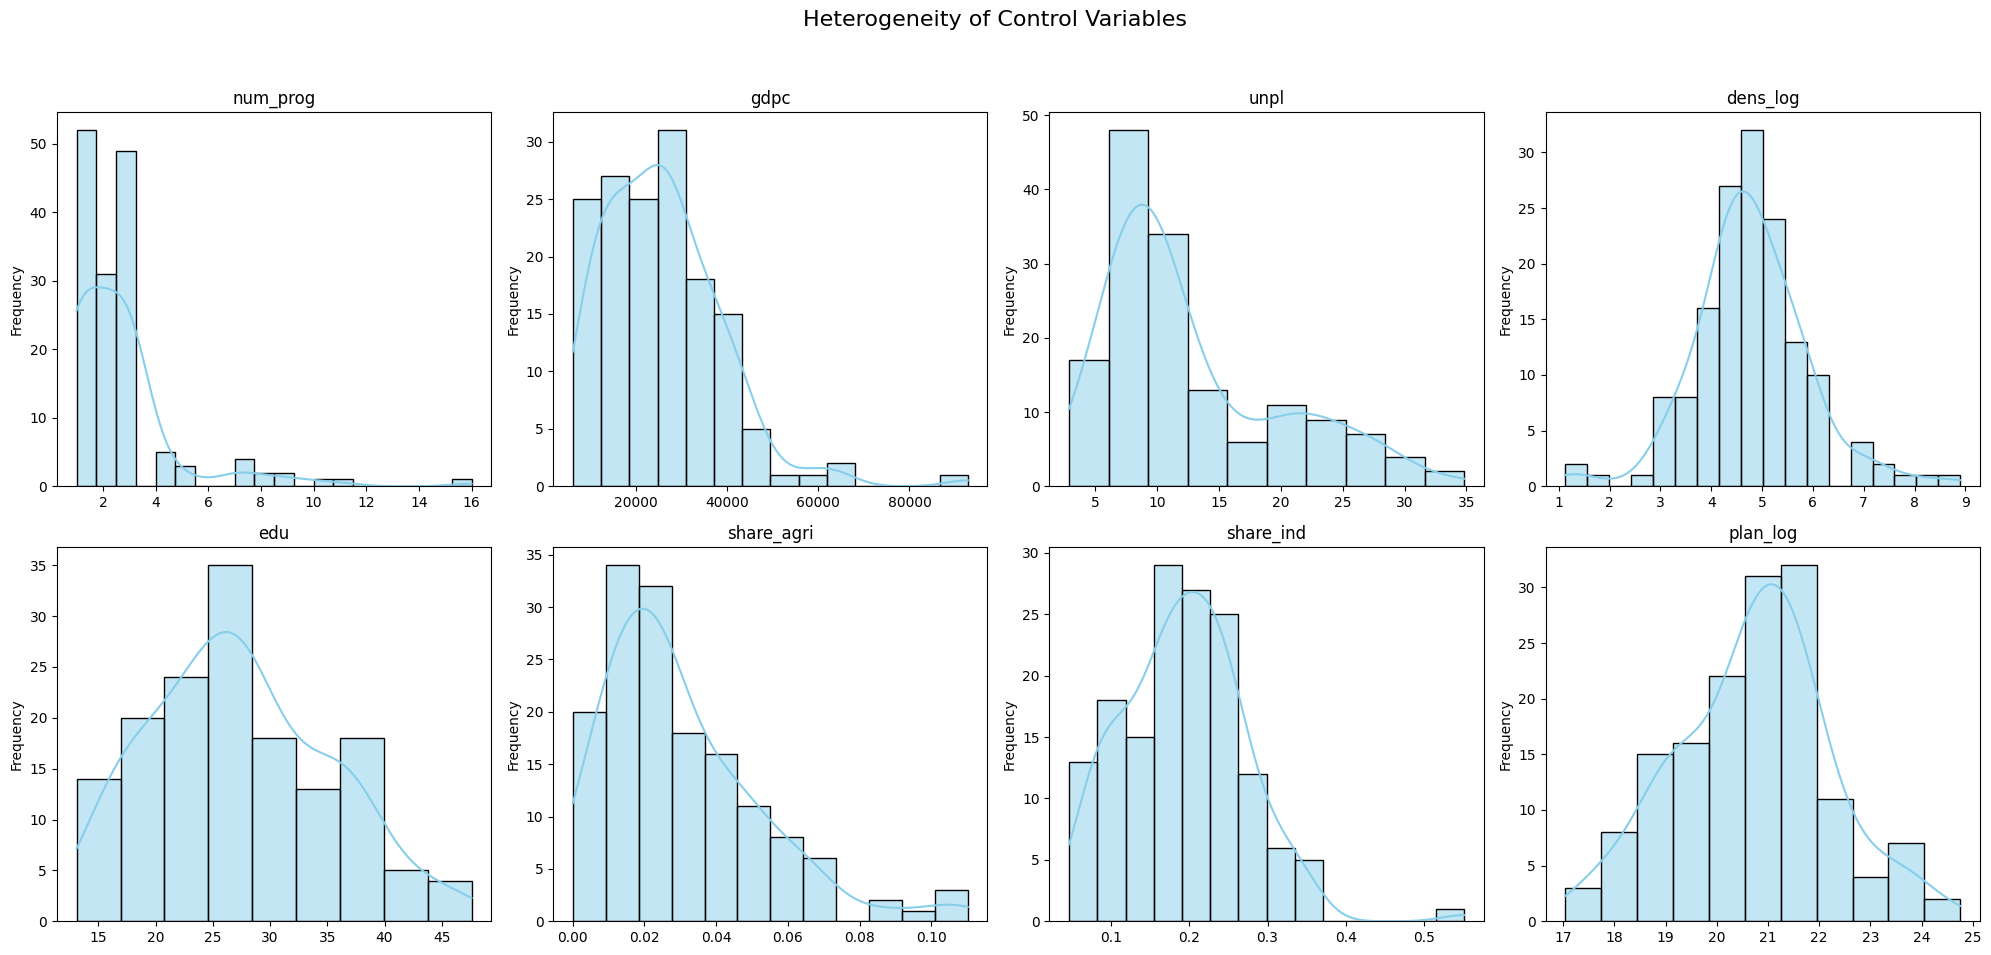

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# List of your control variables
controls_list = [
    'num_prog', 'gdpc', 'unpl', 'dens_log', 
    'edu', 'share_agri', 'share_ind', 'plan_log'
]

# Set up the figure with 8 subplots (2 rows x 4 columns)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Heterogeneity of Control Variables', fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(controls_list):
    # Check if column exists in df to avoid errors
    if col in controls.columns:
        # Plot histogram with KDE (smooth density line)
        sns.histplot(controls[col], kde=True, ax=axes[i], color='skyblue', edgecolor='black')
        axes[i].set_title(col, fontsize=12)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Frequency')
    else:
        # Placeholder if variable is missing (e.g., if 'P' isn't renamed to 'plan_log' yet)
        axes[i].text(0.5, 0.5, f'Column "{col}"\nnot found', 
                     ha='center', va='center', fontsize=12, color='red')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()

In [216]:
controls

,Region_ID,num_prog,gdpc,unpl,dens_log,edu,share_agri,share_ind,plan_log
0,AT,4,38600.0,5.6,4.641502,29.9,0.014349,0.227004,22.544804
1,BE,5,36000.0,8.5,5.912421,36.9,0.007129,0.167180,21.371476
2,BE1,2,64500.0,18.3,8.898284,43.5,0.000223,0.055502,18.751737
3,BE2,1,36200.0,5.1,6.177529,37.2,0.009015,0.199262,18.943333
4,BE3,1,26000.0,11.9,5.365041,33.9,0.008060,0.178463,20.325811
5,BG,10,6100.0,11.4,4.194190,27.0,0.052561,0.226058,23.026554
6,CY,4,20500.0,16.1,4.527209,40.3,0.021047,0.071142,20.676720
7,CZ,8,15100.0,6.1,4.914858,21.5,0.026434,0.314508,23.881001
8,DE,2,36100.0,5.0,5.422745,27.1,0.010048,0.254666,21.746747
9,DE1,3,41500.0,3.1,5.699105,29.8,0.006111,0.342568,21.095520


In [217]:
controls.to_csv("./datasets/clean/controls.csv", index=False)